In [1]:
# nhập dữ liệu và thư viện
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_row',1000)
target=pd.read_table('TARGET.TXT')
sales=pd.read_excel('Test BI.xlsx',sheet_name='DATA 2 - DOANH SỐ BÁN')

# DOANH SỐ BÁN HÀNG VÀ KPI ĐẠT ĐƯỢC THÁNG 4 5 6

In [2]:
# Tổng sale theo ngành hàng
sales_by_line=sales.groupby('Danh mục').sum().drop(columns='Giá bán bình quân').reset_index()
# kết hợp 2 bảng sale và target
sale_and_target=pd.merge(sales_by_line,target,left_on='Danh mục',right_on='Ngành hàng').drop(columns='Danh mục')
# thêm cột KPI tháng 06: sale tháng 06 /target tháng 06
sale_and_target['KPI_thang_06']=(sale_and_target['Doanh số tháng 6']/sale_and_target['2020.06']*100).round(2)
# thêm cột KPI tháng 05: sale tháng 05 /target tháng 05
sale_and_target['KPI_thang_05']=(sale_and_target['Doanh số tháng 5']/sale_and_target['2020.05']*100).round(2)
# thêm cột KPI tháng 04: sale tháng 04 /target tháng 04
sale_and_target['KPI_thang_04']=(sale_and_target['Doanh số tháng 4']/sale_and_target['2020.04']*100).round(2)
# kết quả cuối cùng:
kpi=sale_and_target[['Ngành hàng','KPI_thang_06','KPI_thang_05','KPI_thang_04','Doanh số tháng 6','Doanh số tháng 5','Doanh số tháng 4']]
kpi

,Ngành hàng,KPI_thang_06,KPI_thang_05,KPI_thang_04,Doanh số tháng 6,Doanh số tháng 5,Doanh số tháng 4
0,APPLE WATCH CŨ,111.45,156.45,106.70,638400000,761600000,766080000
1,ASUS CŨ,105.44,331.77,754.85,56000000,179200000,423360000
2,HONOR CŨ,91.35,79.20,179.72,11200000,8000000,22400000
3,HUAWEI CŨ,103.73,89.27,87.78,246400000,190400000,241920000
4,IPAD CŨ,90.31,70.55,74.73,2318400000,1344000000,1572480000
5,IPHONE CŨ,104.77,81.13,96.69,35011200000,30184000000,34211520000
6,KHÁC CŨ,102.87,45.73,151.72,22400000,11200000,40320000
7,MACBOOK CŨ,98.86,47.09,44.84,448000000,190400000,200400000
8,NOKIA CŨ,83.36,159.71,185.62,145600000,224000000,219520000
9,OPPO CŨ,105.48,72.77,68.30,358400000,212800000,208544000


# ĐỒ THỊ KPI 3 THÁNG CỦA TỪNG NGÀNH HÀNG

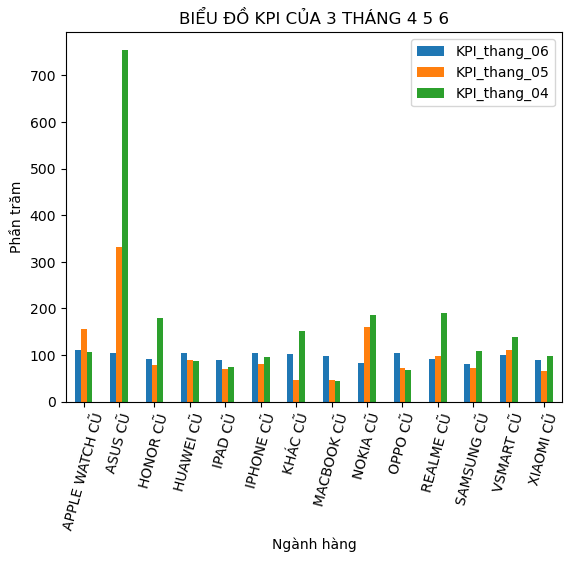

In [3]:
# thêm cột KPI tháng 06: sale tháng 06 /target tháng 06
sale_and_target['KPI_thang_06']=(sale_and_target['Doanh số tháng 6']/sale_and_target['2020.06']*100).round(2)
# thêm cột KPI tháng 05: sale tháng 05 /target tháng 05
sale_and_target['KPI_thang_05']=(sale_and_target['Doanh số tháng 5']/sale_and_target['2020.05']*100).round(2)
# thêm cột KPI tháng 04: sale tháng 04 /target tháng 04
sale_and_target['KPI_thang_04']=(sale_and_target['Doanh số tháng 4']/sale_and_target['2020.04']*100).round(2)
# dựng đồ thị cột:
sale_and_target.plot(x='Ngành hàng',y=['KPI_thang_06','KPI_thang_05','KPI_thang_04'],kind='bar',rot=75)
plt.title('BIỂU ĐỒ KPI CỦA 3 THÁNG 4 5 6')
plt.ylabel('Phần trăm')
plt.savefig('KPICacThang456')
plt.show()

# TỒN KHO THEO DANH MỤC TẠI THỜI ĐIỂM 12/7

In [4]:
# nhập dữ liệu tồn kho
invetory=pd.read_excel('Test BI.xlsx',sheet_name='DATA 1 - TỒN KHO THÁNG 7')
inventory_by_line=invetory.groupby('Danh mục')['Tồn có thể bán'].sum().reset_index(name='Tồn kho')
inventory_by_line

,Danh mục,Tồn kho
0,APPLE WATCH CŨ,92.0
1,ASUS CŨ,7.0
2,HONOR CŨ,8.0
3,HUAWEI CŨ,22.0
4,IPAD CŨ,147.0
5,IPHONE CŨ,2651.0
6,KHÁC CŨ,13.0
7,MACBOOK CŨ,95.0
8,NOKIA CŨ,82.0
9,OPPO CŨ,44.0


# ĐỒ THỊ TỒN KHO TỪNG NGÀNH HÀNG NGÀY 12/7

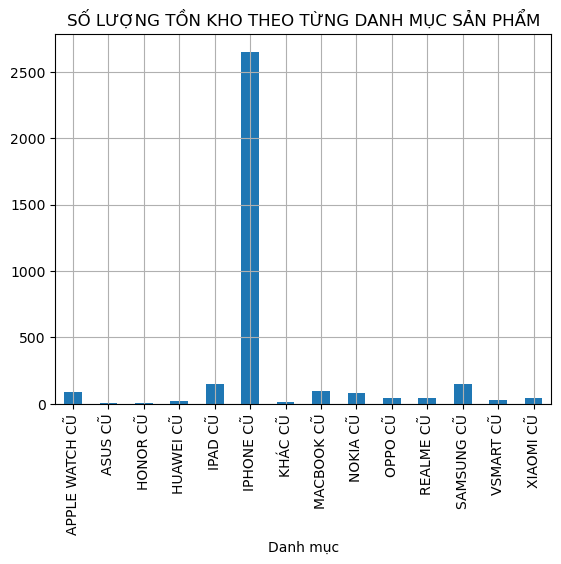

In [5]:
invetory.groupby('Danh mục')['Tồn có thể bán'].sum().plot(kind='bar',grid=True,title='SỐ LƯỢNG TỒN KHO THEO TỪNG DANH MỤC SẢN PHẨM')
plt.savefig('SoLuongTonKhoTheoDanhMucSanPham')
plt.show()

# TỒN KHO THEO SẢN PHẨM TẠI THỜI ĐIỂM 12/7

In [6]:
invetory_by_product=invetory.groupby('Tên sản phẩm')['Tồn có thể bán'].sum().reset_index(name='Tồn kho')
invetory_by_product

,Tên sản phẩm,Tồn kho
0,iPhone 8 Plus 128GB Chính hãng,1.0
1,iPhone SE 2020 128GB chính hãng VN/A,4.0
2,iPhone SE 2020 256GB chính hãng VN/A,1.0
3,APPLE IPAD 2 3G 16GB TRẮNG CŨ - ĐẸP,0.0
4,APPLE IPAD 9.7 2017 4G 32GB BẠC CŨ - ĐẸP,11.0
5,APPLE IPAD 9.7 2017 4G 32GB VÀNG CŨ - ĐẸP,6.0
6,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - XƯỚC CẤN,1.0
7,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - ĐẸP,16.0
8,APPLE IPAD 9.7 2018 4G 32GB VÀNG CŨ - ĐẸP,1.0
9,APPLE IPAD 9.7 2018 WIFI 32GB VÀNG CŨ - XƯỚC CẤN,1.0


# CÁC SẢN PHẨM CÓ TỒN KHO = 0

In [7]:
invetory_zero_by_product=invetory_by_product[invetory_by_product['Tồn kho']==0]
invetory_zero_by_product

,Tên sản phẩm,Tồn kho
3,APPLE IPAD 2 3G 16GB TRẮNG CŨ - ĐẸP,0.0
10,APPLE IPAD AIR 2 4G 128GB BẠC CŨ - ĐẸP,0.0
12,APPLE IPAD AIR 2 4G 16GB VÀNG CŨ - ĐẸP,0.0
14,APPLE IPAD AIR 2 4G 16GB XÁM CŨ - ĐẸP,0.0
18,APPLE IPAD AIR 2 4G 64GB BẠC CŨ - ĐẸP,0.0
19,APPLE IPAD AIR 2 4G 64GB VÀNG CŨ - ĐẸP,0.0
20,APPLE IPAD AIR 2 WIFI 16GB VÀNG CŨ - ĐẸP,0.0
21,APPLE IPAD AIR 4G 16GB BẠC CŨ - XƯỚC CẤN,0.0
23,APPLE IPAD AIR 4G 16GB TRẮNG CŨ,0.0
25,APPLE IPAD AIR 4G 32GB BẠC CŨ - ĐẸP,0.0


# CÁC SẢN PHẨM CÒN TỒN KHO

In [8]:
invetory_not_zero_by_product=invetory_by_product[invetory_by_product['Tồn kho']!=0]
invetory_not_zero_by_product

,Tên sản phẩm,Tồn kho
0,iPhone 8 Plus 128GB Chính hãng,1.0
1,iPhone SE 2020 128GB chính hãng VN/A,4.0
2,iPhone SE 2020 256GB chính hãng VN/A,1.0
4,APPLE IPAD 9.7 2017 4G 32GB BẠC CŨ - ĐẸP,11.0
5,APPLE IPAD 9.7 2017 4G 32GB VÀNG CŨ - ĐẸP,6.0
6,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - XƯỚC CẤN,1.0
7,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - ĐẸP,16.0
8,APPLE IPAD 9.7 2018 4G 32GB VÀNG CŨ - ĐẸP,1.0
9,APPLE IPAD 9.7 2018 WIFI 32GB VÀNG CŨ - XƯỚC CẤN,1.0
11,APPLE IPAD AIR 2 4G 16GB BẠC CŨ - TRẦY XƯỚC,1.0


# DỰ ĐOÁN TỒN KHO VÀ LƯỢNG BÁN ĐẾN 31/7

- Để tính lượng bán mỗi ngày ta lấy trung bình cộng của 3 giá trị: số bán ngày hôm qua, trung bình số bán 3 ngày qua, trung bình số bán 7 ngày qua
- Sau đó, nhân giá trị này với 19 (19 ngày từ 12/7 tới 31/7) để ước lượng số lượng bán tới cuối tháng 7
- Cuối cùng, lấy tồn kho hiện tại - lượng bán đến cuối tháng 7 để tìm ra các danh mục, sản phẩm nào cần nhập thêm

# BẢNG DỰ ĐOÁN LƯỢNG BÁN RA THEO TỪNG DANH MỤC ĐẾN 31/7

In [9]:
# tổng hàng tồn kho theo danh mục
inventory_by_line_07=invetory.groupby('Danh mục')['Tồn có thể bán'].sum().reset_index(name='Tồn Kho Hiện tại')
# ước lượng tổng bán hàng tháng 7 
# số lượng bán 1 ngày * 19 ngày còn lại (hiện tại 12/7 tới 31/7)
# số lượng bán 1 ngày = trung bình số lượng bán của 3 ngày, 7 ngày và ngày hôm qua
sale_07=((invetory.groupby('Danh mục')['Số bán 3 ngày qua'].sum()/3+invetory.groupby('Danh mục')['Số bán 7 ngày qua'].sum()/7+invetory.groupby('Danh mục')['Số bán hôm qua'].sum())/3*19).round(0).reset_index(name='Số bán cuối tháng 7')
# kết hợp bảng tồn kho và bảng bán hàng cuối tháng 7
forecast_by_line_07=pd.merge(inventory_by_line_07,sale_07)
forecast_by_line_07

,Danh mục,Tồn Kho Hiện tại,Số bán cuối tháng 7
0,APPLE WATCH CŨ,92.0,47.0
1,ASUS CŨ,7.0,11.0
2,HONOR CŨ,8.0,0.0
3,HUAWEI CŨ,22.0,20.0
4,IPAD CŨ,147.0,195.0
5,IPHONE CŨ,2651.0,2130.0
6,KHÁC CŨ,13.0,3.0
7,MACBOOK CŨ,95.0,11.0
8,NOKIA CŨ,82.0,76.0
9,OPPO CŨ,44.0,47.0


# DỰ ĐOÁN CÁC DANH MỤC SẢN PHẨM CÓ LƯỢNG TỒN KHO THẤP HƠN LƯỢNG BÁN RA

In [10]:
# tính tồn kho cuối tháng của bảng
forecast_by_line_07['Tồn kho cuối tháng 7']=forecast_by_line_07['Tồn Kho Hiện tại']-forecast_by_line_07['Số bán cuối tháng 7']
# tìm danh mục sản phẩm có tồn kho cuối tháng âm
line_need_charge=forecast_by_line_07.loc[forecast_by_line_07['Tồn kho cuối tháng 7']<0,['Danh mục','Tồn Kho Hiện tại','Số bán cuối tháng 7']]
line_need_charge

,Danh mục,Tồn Kho Hiện tại,Số bán cuối tháng 7
1,ASUS CŨ,7.0,11.0
4,IPAD CŨ,147.0,195.0
9,OPPO CŨ,44.0,47.0
11,SAMSUNG CŨ,147.0,242.0
12,VSMART CŨ,31.0,77.0
13,XIAOMI CŨ,42.0,89.0


# BẢNG DỰ ĐOÁN LƯỢNG BÁN RA THEO TỪNG SẢN PHẨM ĐẾN 31/7

In [11]:
# tổng hàng tồn kho theo Tên sản phẩm
inventory_by_product_07=invetory.groupby('Tên sản phẩm')['Tồn có thể bán'].sum().reset_index(name='Tồn Kho Hiện tại')
# ước lượng tổng bán hàng tháng 7 = số lượng bán 1 ngày * 19 ngày còn lại (hiện tại 12/7 tới 31/7)
# số lượng bán 1 ngày = trung bình số lượng bán của 3 ngày, 7 ngày và ngày hôm qua
sale_07=((invetory.groupby('Tên sản phẩm')['Số bán 3 ngày qua'].sum()/3+invetory.groupby('Tên sản phẩm')['Số bán 7 ngày qua'].sum()/7+invetory.groupby('Tên sản phẩm')['Số bán hôm qua'].sum())/3*19).round(0).reset_index(name='Số bán cuối tháng 7')
# kết hợp bảng tồn kho và bảng bán hàng cuối tháng 7
forecast_by_product_07=pd.merge(inventory_by_product_07,sale_07)
forecast_by_product_07

,Tên sản phẩm,Tồn Kho Hiện tại,Số bán cuối tháng 7
0,iPhone 8 Plus 128GB Chính hãng,1.0,3.0
1,iPhone SE 2020 128GB chính hãng VN/A,4.0,2.0
2,iPhone SE 2020 256GB chính hãng VN/A,1.0,0.0
3,APPLE IPAD 2 3G 16GB TRẮNG CŨ - ĐẸP,0.0,0.0
4,APPLE IPAD 9.7 2017 4G 32GB BẠC CŨ - ĐẸP,11.0,5.0
5,APPLE IPAD 9.7 2017 4G 32GB VÀNG CŨ - ĐẸP,6.0,2.0
6,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - XƯỚC CẤN,1.0,0.0
7,APPLE IPAD 9.7 2017 4G 32GB XÁM CŨ - ĐẸP,16.0,4.0
8,APPLE IPAD 9.7 2018 4G 32GB VÀNG CŨ - ĐẸP,1.0,0.0
9,APPLE IPAD 9.7 2018 WIFI 32GB VÀNG CŨ - XƯỚC CẤN,1.0,0.0


# DỰ ĐOÁN CÁC TÊN SẢN PHẨM CÓ LƯỢNG TỒN KHO THẤP HƠN LƯỢNG BÁN RA

In [12]:
# tính tồn kho cuối tháng của bảng
forecast_by_product_07['Tồn kho cuối tháng 7']=forecast_by_product_07['Tồn Kho Hiện tại']-forecast_by_product_07['Số bán cuối tháng 7']
# tìm tên sản phẩm có tồn kho cuối tháng âm
product_need_charge=forecast_by_product_07[forecast_by_product_07['Tồn kho cuối tháng 7']<0]
product_need_charge

,Tên sản phẩm,Tồn Kho Hiện tại,Số bán cuối tháng 7,Tồn kho cuối tháng 7
0,iPhone 8 Plus 128GB Chính hãng,1.0,3.0,-2.0
16,APPLE IPAD AIR 2 4G 32GB VÀNG CŨ - ĐẸP,1.0,9.0,-8.0
18,APPLE IPAD AIR 2 4G 64GB BẠC CŨ - ĐẸP,0.0,8.0,-8.0
19,APPLE IPAD AIR 2 4G 64GB VÀNG CŨ - ĐẸP,0.0,8.0,-8.0
22,APPLE IPAD AIR 4G 16GB BẠC CŨ - ĐẸP,4.0,6.0,-2.0
32,APPLE IPAD MINI 3 4G 16GB VÀNG CŨ - ĐẸP,0.0,3.0,-3.0
66,APPLE IPHONE 6 64GB BẠC CŨ - TRẦY XƯỚC,0.0,1.0,-1.0
69,APPLE IPHONE 6 64GB VÀNG CŨ - TRẦY XƯỚC,0.0,1.0,-1.0
71,APPLE IPHONE 6 64GB VÀNG CŨ - ĐẸP,0.0,3.0,-3.0
81,APPLE IPHONE 6 PLUS 64GB XÁM CŨ - ĐẸP,0.0,1.0,-1.0


In [13]:
# lưu các kết quả vào file excel với mỗi sheet chứa 1 kết quả
with pd.ExcelWriter("output.xlsx") as writer:
    kpi.to_excel(writer, sheet_name="kpi", index=False)
    inventory_by_line.to_excel(writer, sheet_name="inventory_by_line", index=False)
    invetory_by_product.to_excel(writer, sheet_name="invetory_by_product", index=False)
    invetory_zero_by_product.to_excel(writer, sheet_name="invetory_zero_by_product", index=False)
    invetory_not_zero_by_product.to_excel(writer, sheet_name="invetory_not_zero_by_product", index=False)
    forecast_by_line_07.to_excel(writer, sheet_name="forecast_by_line_07", index=False)
    line_need_charge.to_excel(writer, sheet_name="line_need_charge", index=False)
    forecast_by_product_07.to_excel(writer, sheet_name="forecast_by_product_07", index=False)
    product_need_charge.to_excel(writer, sheet_name="product_need_charge", index=False)